Title: Adaptive Color Scheme

About the technique:
The main motive of using this technique is to make the model invariant to colours. The color distribution of the training dataset will clearly have an impact on what colours the model is going to look for. For example, if there are more number of orange cats in the dataset, then the model might believe that cats are only in orange. So, to address these kinds of issues we have adaptive color scheme. Here, we will analyze the color distribution of each image in the training using histogram and inverse it so that the colors which are not in the images pops up. Now, among these colours we will select the top 6 colours and apply that colour shade on the image to produce new image with different shade of color.

Importing the required libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Using this function, we can find top colors which are present in the least amount in the image
def top_shades(new_hist):
    freq = new_hist[0]
    freq = list(freq[1:-1])
    indexes = []
    maxi_val = 0
    while len(indexes) < 6:
        maxi_val = 0
        for i in freq:
            if i > maxi_val and freq.index(i) not in indexes:
                maxi_val = i
        indexes.append(freq.index(maxi_val))
    shades = []
    for i in indexes:
        shades.append(new_hist[1][i])
    return shades

In [3]:
img = cv.imread(r"D:\Samsung Prism\Datasets\Cat and Dog\Training\Cat\cat.111.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (300, 300))

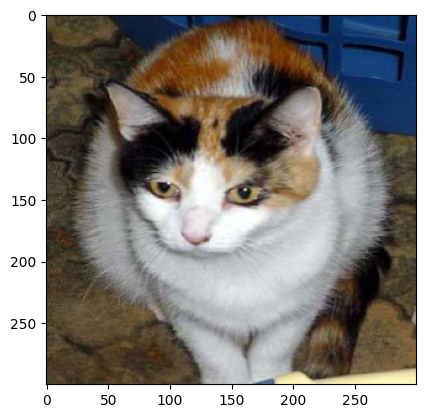

In [4]:
plt.imshow(img)

In [5]:
#Getting the histogram distribution of each color channel
hist0 = cv.calcHist([img],[0],None,[256],[0,256])
hist1 = cv.calcHist([img],[1],None,[256],[0,256])
hist2 = cv.calcHist([img],[2],None,[256],[0,256])

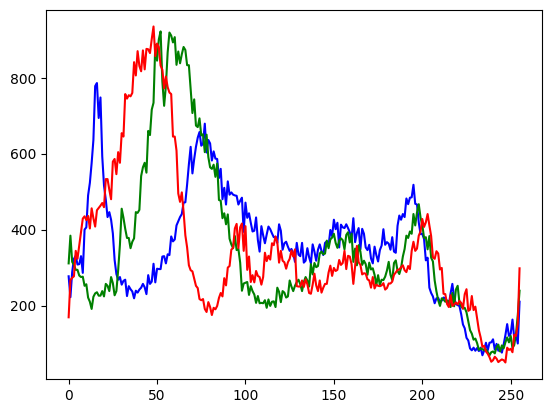

In [6]:
plt.plot(hist0, color="b")
plt.plot(hist1, color="g")
plt.plot(hist2, color="r")

In [7]:
#Inversing the histogram so that the least present colours will come to the surface
new_hist0 = 255-hist0
new_hist1 = 255-hist1
new_hist2 = 255-hist2

In [8]:
#Zeroing any negative values due to the inversions
new_hist0[new_hist0 < 0] = 0
new_hist1[new_hist1 < 0] = 0
new_hist2[new_hist2 < 0] = 0

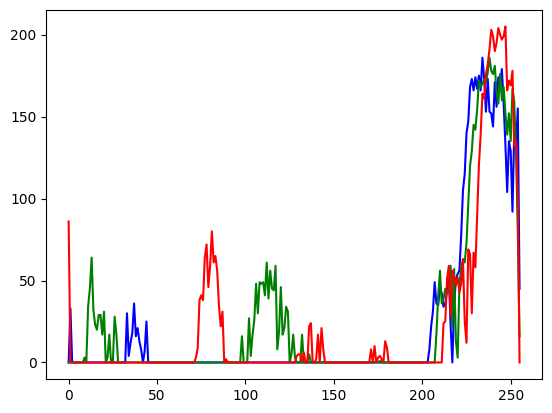

In [9]:
plt.plot(new_hist0, color="b")
plt.plot(new_hist1, color="g")
plt.plot(new_hist2, color="r")

In [10]:
new_hist0 = np.histogram(new_hist0, bins=50)
new_hist1 = np.histogram(new_hist1, bins=50)
new_hist2 = np.histogram(new_hist2, bins=50)

In [11]:
#Find the top shades of rgb channels which are not in the image
b = top_shades(new_hist0)
g = top_shades(new_hist1)
r = top_shades(new_hist2)

In [12]:
print(r)
print(g)
print(b)
img = img/255

[0.0, 4.1, 20.5, 24.6, 8.2, 69.7]
[11.16, 40.92, 52.08, 37.2, 14.88, 0.0]
[29.76, 167.4, 148.8, 26.04, 0.0, 52.08]


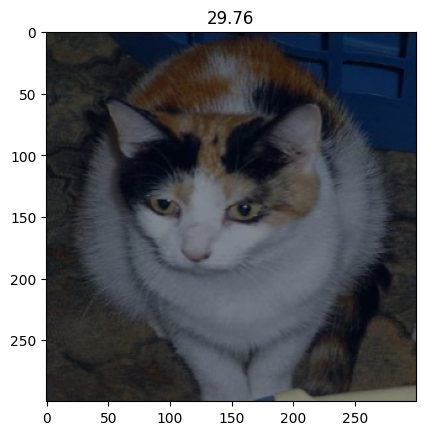

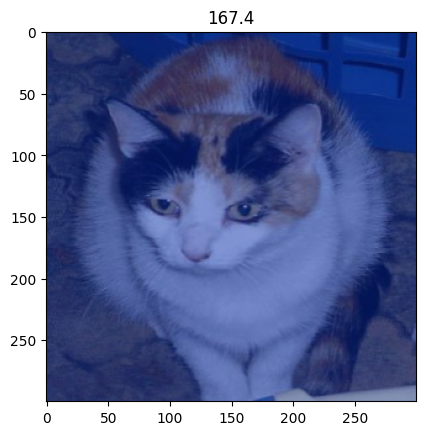

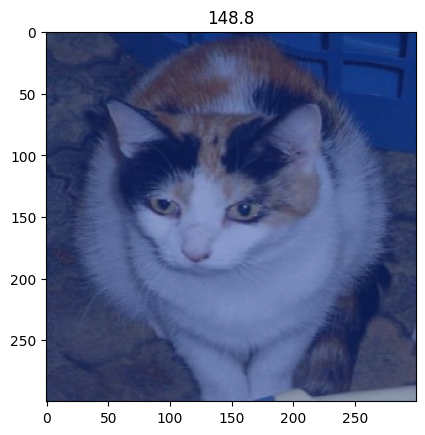

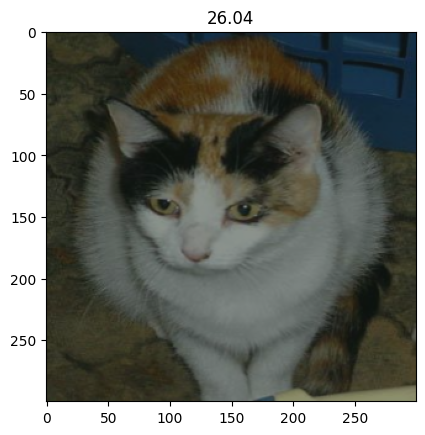

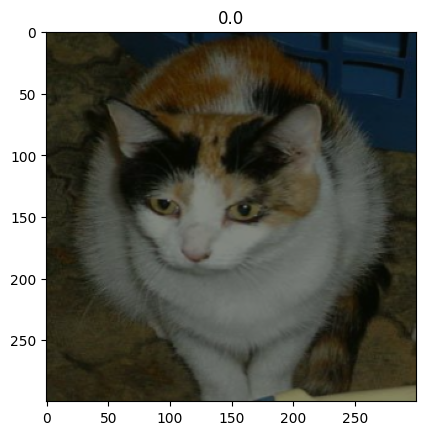

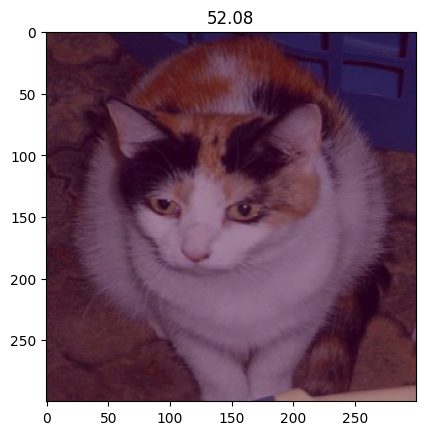

<Figure size 640x480 with 0 Axes>

In [13]:
#Applying the shades and generating the new data
for i in range(6):
    b_shade = np.zeros((300, 300, 3))
    #print(b[i])
    for j in range(300):
        for k in range(300):
            for m in range(3):
                if m == 0:
                    b_shade[j][k][m] = r[i]/255
                if m == 1:
                    b_shade[j][k][m] = g[i]/255
                if m == 2:
                    b_shade[j][k][m] = b[i]/255
    op = cv.addWeighted(img, 0.5, b_shade, 0.5, 0)
    plt.title(b[i])
    plt.imshow(op)
    plt.figure()